In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
DATA_PATH = "D:DataS\YOB"

#1 Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
#2 Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
#3 Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
#4 Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".


names = pd.read_csv(f"{DATA_PATH}\yob1902.txt", names = ["Name", "Gender", "Count"])
names.sort_values(by=["Count"], ascending=False).head(3)

,Name,Gender,Count
0,Mary,F,14486
2042,John,M,7907
2043,William,M,6616


In [ ]:
#1 Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [18]:
#2 Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
names_dict = {}
for year in range (1900, 2001, 5):
    print(year)
    names_dict[year] =  pd.read_csv(f"{DATA_PATH}\yob{year}.txt", names = ["Name", "Gender", "Count"])
    names_dict[year] = names_dict[year]["Gender"]=="F"
print(names_dict)

1900
1905
1910
1915
1920
1925
1930
1935
1940
1945
1950
1955
1960
1965
1970
1975
1980
1985
1990
1995
2000
{1900: 0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
3700    False
3701    False
3702    False
3703    False
3704    False
3705    False
3706    False
3707    False
3708    False
3709    False
3710    False
3711    False
3712    False
3713    False
3714    False
3715    False
3716    False
3717    False
3718    False
3719    False
3720    False
3721    False
3722    False
3723    False
3724    False
3725    False
3726    False
3727    False
3728    False
3729    False
Name: Gender, Length: 3730, dtype:

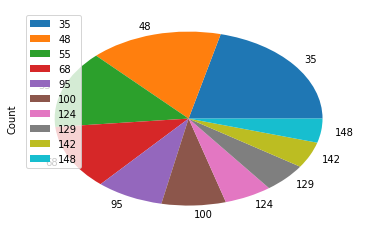

In [13]:
#3 Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
names_1950 = pd.read_csv(f"{DATA_PATH}\yob1950.txt", names = ["Name", "Gender", "Count"])
names_1950[(names_1950.Name.str.startswith("R"))].head(10).plot.pie(y="Count")

In [ ]:
#4 Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

